<a href="https://colab.research.google.com/github/PolyGon-13/AI_Study/blob/main/OCR_Read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR 모델 실행하기

In [ ]:
!wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
!pip install -r requirements-colab.txt

!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png

--2024-09-25 13:33:43--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123 [text/plain]
Saving to: ‘requirements-colab.txt’

requirements-colab. 100%[===================>]     123  --.-KB/s    in 0s      

2024-09-25 13:33:44 (5.86 MB/s) - ‘requirements-colab.txt’ saved [123/123]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is

--2024-09-25 13:34:17--  https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/examples/Hello.png [following]
--2024-09-25 13:34:17--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/examples/Hello.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42139 (41K) [image/png]
Saving to: ‘Hello.png’

Hello.png           100%[===================>]  41.15K  --.-KB/s    in 0.01s   

2024-09-25 13:34:18 (4.14 MB/s) - ‘Hello.png’ saved [42139/42139]

--2024-09-25 13:34:18--  https://github.com/mrsyee/dl_apps/raw

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

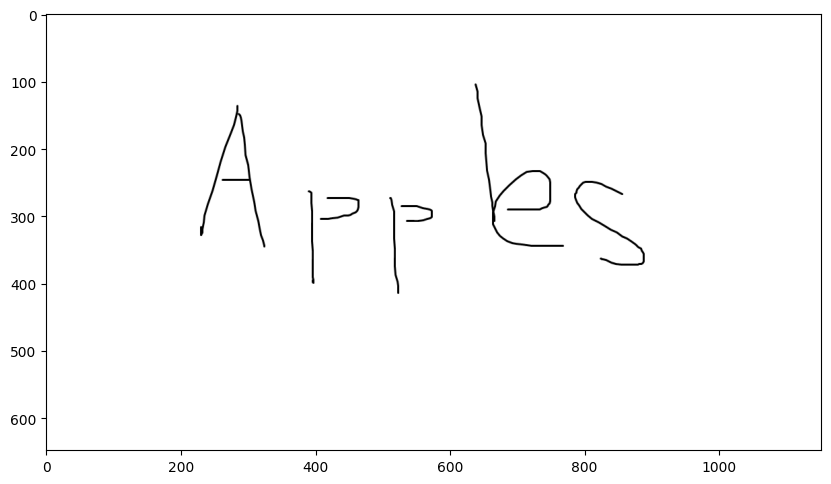

In [ ]:
image=Image.open("apple.png").convert("RGB")

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis("on")
plt.show()

In [ ]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[INFO] Load pretrained VisionEncoderDecoderModel


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values
token_ids = model.generate(pixel_values)
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [ ]:
text_from_image

'Apples'

# 애플리케이션 구현하기

In [ ]:
!wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
!pip install -r requirements-colab.txt

!mkdir examples
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello_cursive.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Red.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/i_love_you.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/merrychristmas.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Rock.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Bob.png

--2024-09-25 13:53:20--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123 [text/plain]
Saving to: ‘requirements-colab.txt’

requirements-colab. 100%[===================>]     123  --.-KB/s    in 0s      

2024-09-25 13:53:20 (6.41 MB/s) - ‘requirements-colab.txt’ saved [123/123]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 792.4 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This 

--2024-09-25 13:53:54--  https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/examples/Hello.png [following]
--2024-09-25 13:53:54--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/examples/Hello.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42139 (41K) [image/png]
Saving to: ‘Hello.png’

Hello.png           100%[===================>]  41.15K  --.-KB/s    in 0.001s  

2024-09-25 13:53:54 (46.8 MB/s) - ‘Hello.png’ saved [42139/42139]

--2024-09-25 13:53:55--  https://github.com/mrsyee/dl_apps

In [ ]:
import os
import gradio as gr
import numpy as np
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")


In [ ]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    image=gr.Image(label="Handwritten image file")
    output=gr.Textbox(label="Output Box")
    convert_btn=gr.Button("Convert")

In [ ]:
app.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://28ce1cfe84ab19273f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
app.close()

Closing server running on port: 7860


In [27]:
class TrOCRInferencer:
    def __init__(self):
        print("[INFO] Initialize TrOCR Inferencer.")
        self.processor=TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
        self.model=VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

    def inference(self,image:Image)->str:
        pixel_values=self.processor(images=image,return_tensors="pt").pixel_values
        generated_ids=self.model.generate(pixel_values)
        generated_text=self.processor.batch_decode(generated_ids,skip_special_tokens=True)[0]

        return generated_text

In [28]:
inferencer=TrOCRInferencer()

[INFO] Initialize TrOCR Inferencer.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
def image_to_text(image:np.ndarray)->str:
    image=Image.fromarray(image).convert("RGB")
    text=inferencer.inference(image)
    return text

In [21]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    image=gr.Image(label="Handwritten image file")
    output=gr.Textbox(label="Output Box")
    convert_btn=gr.Button("Convert")
    convert_btn.click(fn=image_to_text,inputs=image,outputs=output)

app.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.40.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://fca1783e83f7586e99.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [22]:
app.close()

Closing server running on port: 7861


In [32]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    sketchpad=gr.Sketchpad(
        label="Handwritten Sketchpad",
        shape=(600,192),
        brush_radius=2,
        invert_colors=False,
    )
    output=gr.Textbox(label="Output Box")
    convert_btn=gr.Button("Convert")
    convert_btn.click(fn=image_to_text,inputs=sketchpad,outputs=output)

app.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.40.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://5e5d10907c09897e19.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [33]:
app.close()

Closing server running on port: 7865
